In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.ticker
import select_work
import pausing
import codons
import brewer2mpl
import scipy.stats
from scipy.linalg import expm
import cartoon
import Sequencing.Visualize
import matplotlib
import itertools

In [2]:
experiments = select_work.build_all_experiments()
enrichments = select_work.load_all_enrichments()

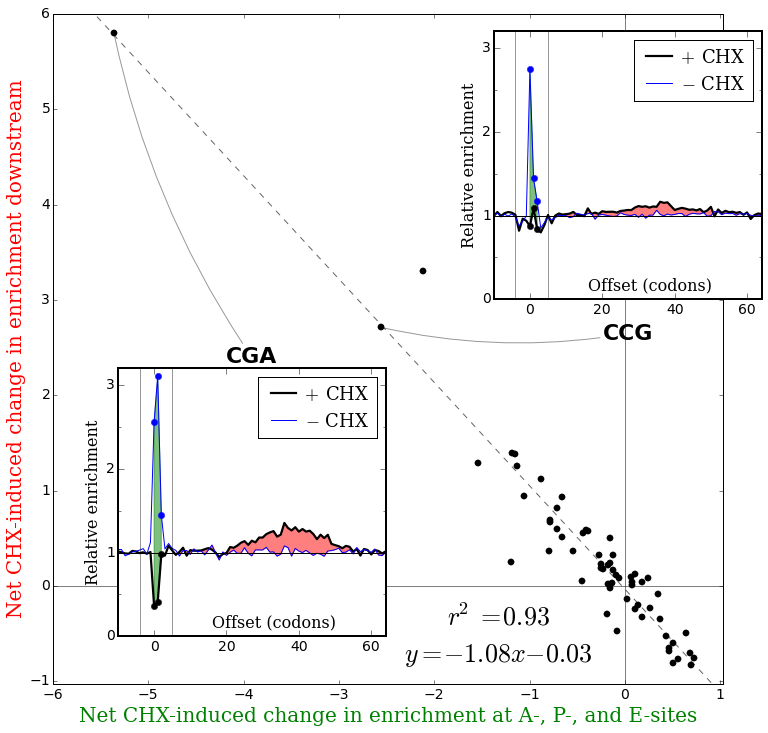

In [52]:
noCHX_name, CHX_name = [
    ('jan -'),
    ('jan +'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-7, -65, -1),
                                        active_slice=slice(-2, 1),
                                        area_between=True,
                                        #exclude=set(['CGA', 'CCG', 'CGG']),
                                        big_codon='CGA',
                                        small_codon='CCG',
                                        change=True,
                                        inset_ylims=(0, 3.2),
                                        #draw_insets=False,
                                        condition=(0.10, 200, 200),
                                        flip_wave=False,
                                        shift_small=(0.065, 0),
                                       )

fig.savefig('paper/area_correlation_jan.png', bbox_inches='tight')

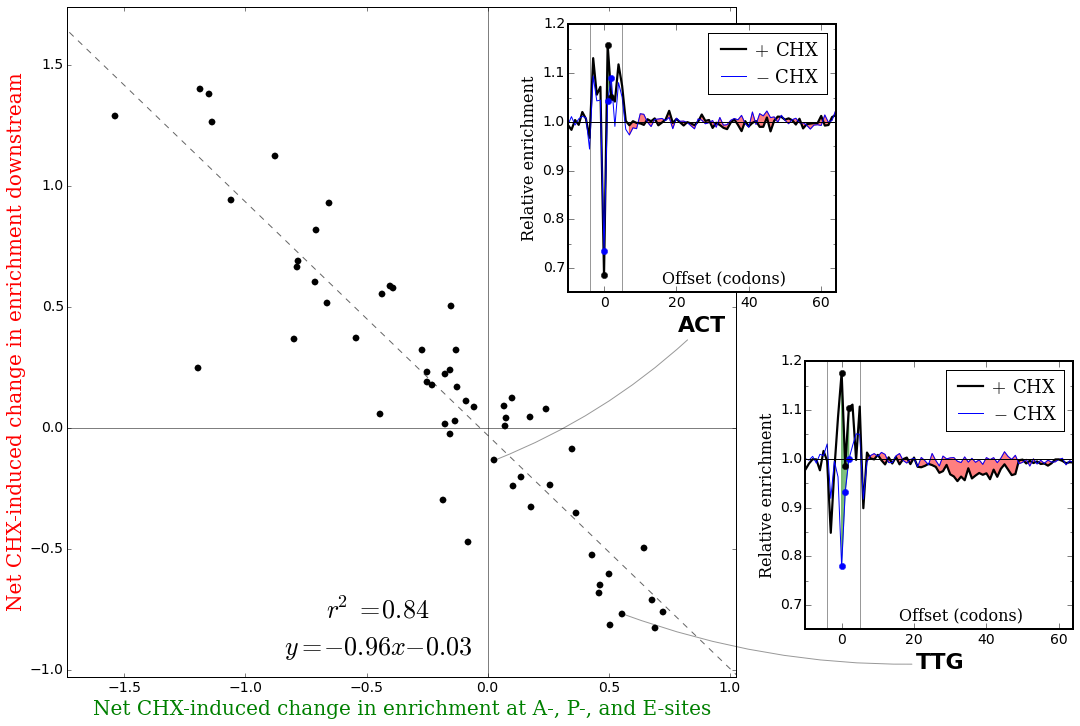

In [54]:
noCHX_name, CHX_name = [
    ('jan -'),
    ('jan +'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-7, -65, -1),
                                        active_slice=slice(-2, 1),
                                        area_between=True,
                                        exclude=set(['CGA', 'CCG', 'CGG']),
                                        big_codon='TTG',
                                        small_codon='ACT',
                                        change=True,
                                        inset_ylims=(0.65, 1.2),
                                        #draw_insets=False,
                                        condition=(0.10, 200, 200),
                                        flip_wave=False,
                                        shift_big=(0.78, 0),
                                        shift_small=(0.135, 0),
                                        text_location=(0.45, 0.14),
                                        big_title='above',
                                        tick_multiple=0.1,
                                       )

fig.savefig('paper/area_correlation_jan_exclude_largest.png', bbox_inches='tight')

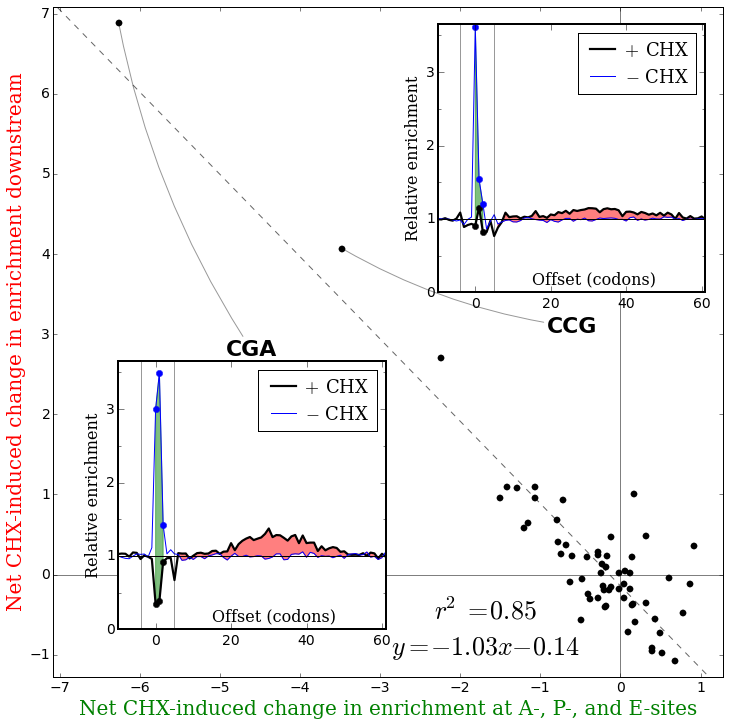

In [64]:
noCHX_name, CHX_name = [
    ('williams -'),
    ('williams +'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-6, -61, -1),
                                        active_slice=slice(-2, 1),
                                        area_between=True,
                                        big_codon='CGA',
                                        small_codon='CCG',
                                        #exclude=set(['CGA', 'CGG', 'CCG']),
                                        #draw_insets=False,
                                        change=True,
                                        inset_ylims=(0, 3.65),
                                        condition=(0.1, 200, 200),
                                        flip_wave=False,
                                        text_location=(0.63, 0.14),
                                       )

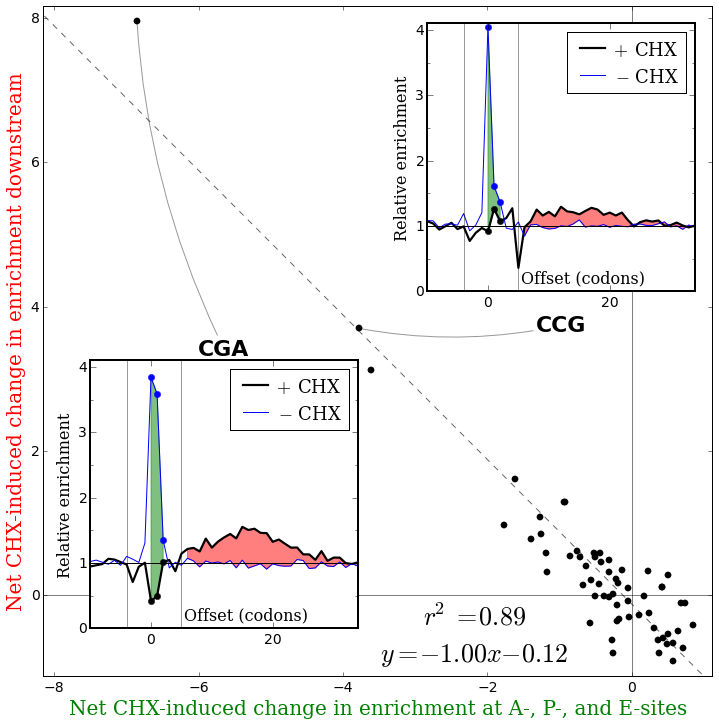

In [79]:
noCHX_name, CHX_name = [
    ('oxidative_noCHX'),
    ('oxidative_8x_CHX'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-6, -35, -1),
                                        active_slice=slice(-2, 1),
                                        #exclude=set(['CGA', 'CGG', 'CCG']),
                                        #draw_insets=False,
                                        area_between=True,
                                        inset_ylims=(0, 4.1),
                                        change=True,
                                        condition=(0.1, 200, 200),
                                        small_codon='CCG',
                                        flip_wave=False,
                                        shift_big=(-0.02, 0),
                                        text_location=(0.63, 0.13),
                                       )

fig.savefig('paper/area_correlation_gerashchenko.png', bbox_inches='tight')

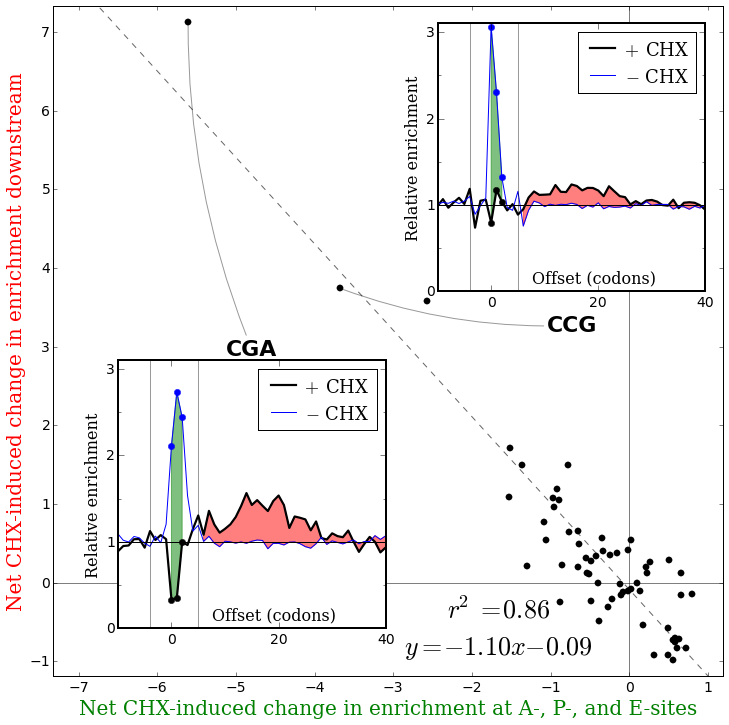

In [78]:
noCHX_name, CHX_name = [
    ('unstressed_noCHX'),
    ('unstressed_8x_CHX'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-6, -41, -1),
                                        active_slice=slice(-2, 1),
                                        #to_label=['CGA', 'CGG', 'CCG', 'ATC'],
                                        #exclude=set(['CGA', 'CGG', 'CCG']),
                                        area_between=True,
                                        big_codon='CGA',
                                        small_codon='CCG',
                                        inset_bg='white',
                                        inset_ylims=(0, 3.1),
                                        change=True,
                                        draw_insets=True,
                                        condition=(0.1, 200, 200),
                                        flip_wave=False,
                                       )

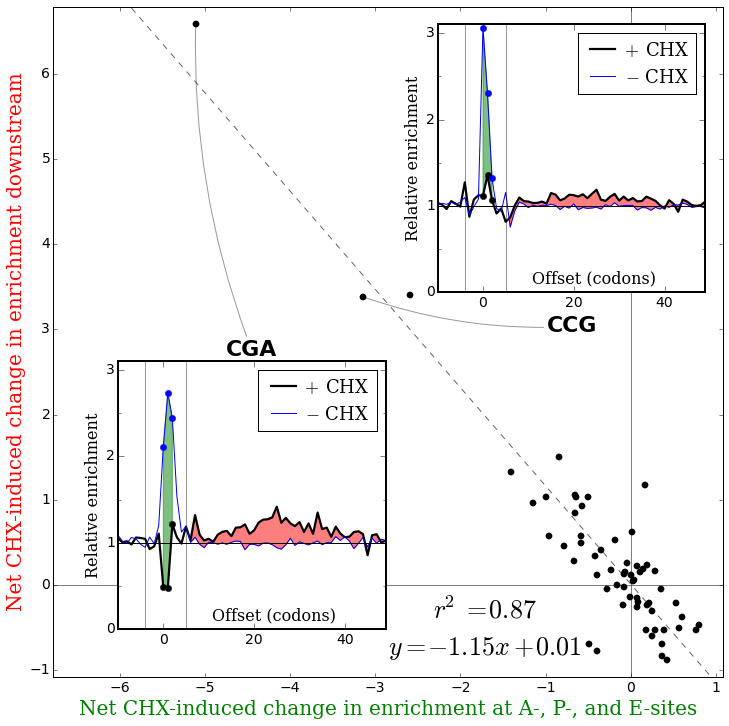

In [77]:
noCHX_name, CHX_name = [
    ('unstressed_noCHX'),
    ('unstressed_1x_CHX'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-6, -50, -1),
                                        active_slice=slice(-2, 1),
                                        #to_label=['CGA', 'CGG', 'CCG', 'ATC'],
                                        #exclude=set(['CGA', 'CGG', 'CCG']),
                                        area_between=True,
                                        big_codon='CGA',
                                        small_codon='CCG',
                                        inset_bg='white',
                                        inset_ylims=(0, 3.1),
                                        change=True,
                                        draw_insets=True,
                                        condition=(0.1, 200, 200),
                                        flip_wave=False,
                                        text_location=(0.63, 0.14),
                                       )

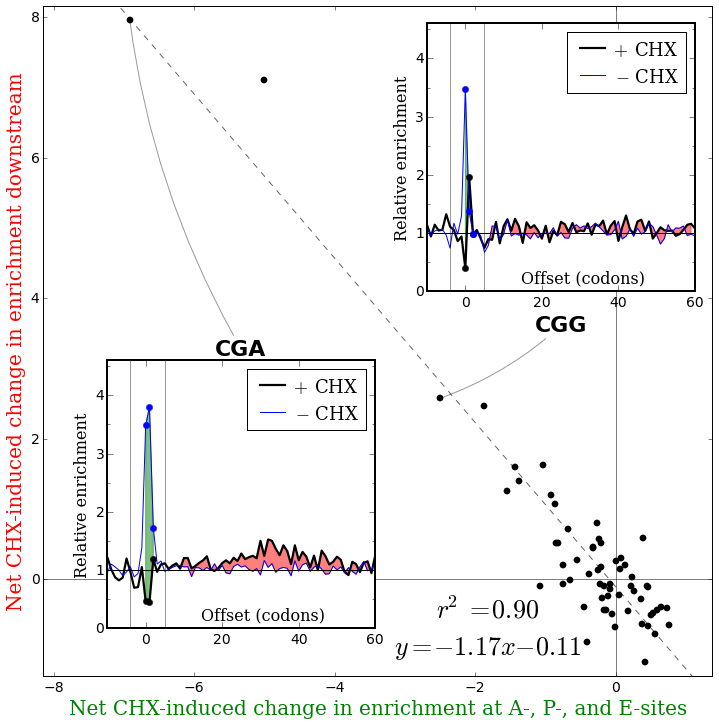

In [32]:
noCHX_name, CHX_name = [
    ('heatshock_noCHX'),
    ('heatshock_1x_CHX'),
]

fig = pausing.offset_difference_scatter(enrichments, noCHX_name, CHX_name,
                                        slice(-6, -60, -1),
                                        active_slice=slice(-2, 1),
                                        area_between=True,
                                        #exclude=set(['CGA', 'CGG', 'CCG']),
                                        #condition=(0.1, 200, 200),
                                        draw_insets=True,
                                        small_codon='CGG',
                                        inset_ylims=(0, 4.6),
                                        flip_wave=False,
                                       )

In [4]:
def plot_differences(enrichments, 
                     first_name,
                     second_name,
                     codon_to_show,
                     wave_slices=[slice(-10, -70, -1)],
                     smooth_window=0,
                     gain_or_loss='gain',
                     condition=(0.1, 200, 200),
                     codon_to_color=lambda x: 'black',
                    ):
    first = enrichments[first_name][condition, 'codon', -90:90, codons.non_stop_codons]
    second = enrichments[second_name][condition, 'codon', -90:90, codons.non_stop_codons]
    
    fig, (in_ax, out_ax, scatter_ax) = plt.subplots(1, 3, figsize=(18, 6))

    for ax in (in_ax, out_ax):
        changes = second - first
        xs = np.arange(-90, 90)
        for codon_id, row in zip(codons.non_stop_codons, changes.T):
            if codon_id == codon_to_show:
                color = 'red'
                alpha = 1
                y_min = row.min() * 1.1
                y_max = row.max() * 1.1
            else:
                color = 'black'
                alpha = 0.01
            smoothed = np.copy(row)
            for i, x in zip(range(len(row)), xs):
                if not -10 < x < 10:
                    smoothed[i] = sum(row[i - smooth_window:i + smooth_window + 1]) / float(2 * smooth_window + 1)

            ax.plot(xs, smoothed, '.-', color=color, alpha=alpha)
        
        #ax.set_ylim(-0.2, 0.2)
        pausing.mark_active_sites_and_borders(ax)
        ax.axhline(0, color='black')
    
    in_ax.set_xlim(-12, 12)
    out_ax.set_xlim(-90, 90)
    pausing.flip_x_axis(in_ax)
    pausing.flip_x_axis(out_ax)
    
    def get_sums(name):
        sums = np.zeros(len(codons.non_stop_codons))
        for wave_slice in wave_slices:
            sums += (enrichments[name][condition, 'codon', wave_slice, codons.non_stop_codons] - 1).sum(axis=0)
        return sums
    
    xs = get_sums(first_name)
    ys = get_sums(second_name) 
    labels = ['{0:s} : {1:+0.2f}'.format(c, v) for c, v in zip(codons.non_stop_codons, ys-xs)]
    if gain_or_loss == 'gain':
        to_label = (ys - xs) == np.max(ys - xs)
    elif gain_or_loss == 'loss':
        to_label = (ys - xs) == np.min(ys - xs)
    else:
        to_label = np.array([c == codon_to_show for c in codons.non_stop_codons])
        
    color_list = [codon_to_color(c) for c in codons.non_stop_codons]
        
    Sequencing.Visualize.enhanced_scatter(xs, ys, scatter_ax,
                                          marker_size=20,
                                          do_fit=True,
                                          color_by_density=False,
                                          show_p_value=False,
                                          show_beta='fit',
                                          variance=True,
                                          color_list=color_list,
                                         )
    
    smallest = min(min(xs), min(ys)) - 0.2
    biggest = max(max(xs), max(ys)) + 0.2
    scatter_ax.set_xlim(smallest, biggest)
    scatter_ax.set_ylim(smallest, biggest)
    
    Sequencing.Visualize.draw_diagonal(scatter_ax)
    
    pausing.label_scatter_plot(scatter_ax, xs, ys, labels, to_label, initial_distance=20)
    
    scatter_ax.set_xlabel(first_name)
    scatter_ax.set_ylabel(second_name)

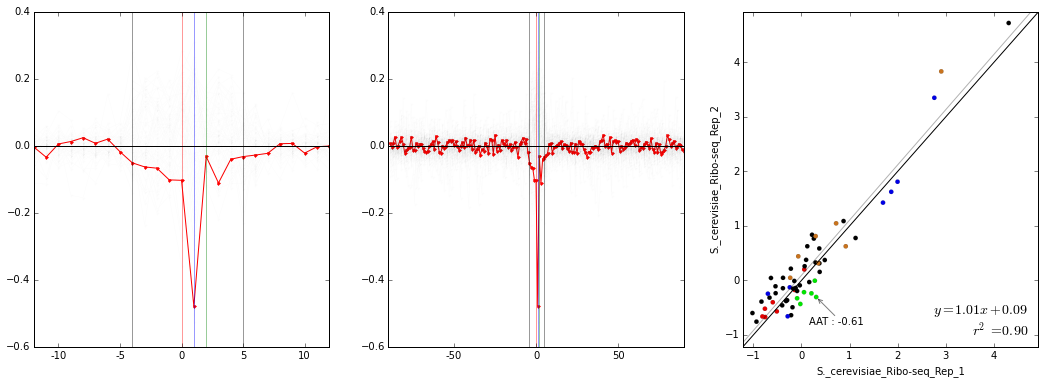

In [6]:
import Sequencing.Visualize.igv_colors

first_name = 'S._cerevisiae_Ribo-seq_Rep_1'
second_name = 'S._cerevisiae_Ribo-seq_Rep_2'

#first_name = 'oxidative_noCHX'
#second_name = 'oxidative_8x_CHX'

def codon_to_color(c):
    color = Sequencing.Visualize.igv_colors.normalized_rgbs['N']
    for base in 'TCAG':
        if base*2 in c:
            color = Sequencing.Visualize.igv_colors.normalized_rgbs[base]
    return color
        
plot_differences(enrichments,
                 first_name,
                 second_name,
                 'AAT',
                 gain_or_loss='force',
                 wave_slices=[slice(-7, -80, -1),
                              slice(-2, 1, 1),
                             ],
                 condition=(0.1, 200, 200),
                 codon_to_color=codon_to_color,
                )

In [62]:
def largest_differences(enrichments, 
                        first_name,
                        second_name,
                        wave_slices,
                        color,
                        smooth_window=0,
                        condition=(0.1, 200, 200),
                        ax=None,
                        codons_to_mark=None,
                        xlims=(-1.5, 1.5),
                        label=None,
                        previous_ymax=0,
                    ):
    if ax == None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    def get_sums(name):
        sums = np.zeros(len(codons.non_stop_codons))
        for wave_slice in wave_slices:
            sums += (enrichments[name][condition, 'codon', wave_slice, codons.non_stop_codons] - 1).sum(axis=0)
        return sums
    
    alpha_color = matplotlib.colors.colorConverter.to_rgba(color, alpha=0.4)
    first = get_sums(first_name)
    second = get_sums(second_name)
    areas = second - first
    ordered = sorted(zip(areas, codons.non_stop_codons))
    
    if max(areas) > xlims[1]:
        xlims = (xlims[0], max(areas) + 0.1)
    if min(areas) < xlims[0]:
        xlims = (min(areas) - 0.1, xlims[1])
        
    counts, _, _ = ax.hist(areas,
                           histtype='stepfilled',
                           bins=np.linspace(xlims[0], xlims[1], 61),
                           color=alpha_color,
                           edgecolor=color,
                           label=label,
                          )
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_size(14)
        label.set_family('serif')
        
    ax.set_xlim(*xlims)
    ymax = max(previous_ymax, max(counts) + 1)
    ax.set_ylim(0, ymax)
    
    ax.set_ylabel('Number of codons', family='serif', size=18)
    
    if codons_to_mark:
        for i, codon_to_mark in enumerate(codons_to_mark):
            v, c = [(v, c) for v, c in ordered if c == codon_to_mark][0]
            ax.annotate(c,
                        xy=(v, 0),
                        xycoords=('data', 'axes fraction'),
                        xytext=(0, -50 * (i + 1.5)),
                        textcoords='offset points',
                        ha='center',
                        color=color,
                        arrowprops={'arrowstyle': '-',
                                    'color': alpha_color,
                                   },
                        size=18,
                        weight='bold',
                       )
    
    #for val, codon_id in ordered[:1]:
    #    print '{0:+0.2f}\t{1}'.format(val, codon_id)
    #for val, codon_id in ordered[-1:]:
    #    print '{0:+0.2f}\t{1}'.format(val, codon_id)
    #print
    
    return ymax

def compare_active_to_corrected(wt_name,
                                deletion_name,
                                deletion_label,
                                codons_to_mark,
                                ax,
                                active_slice=slice(-2, 1, 1),
                                wave_slice=slice(-6, -90, -1),
                                condition=(0.1, 200, 200),
                               ):
    colors = pausing.get_color_iter()
    colors.next()
    colors.next()
    ymax = largest_differences(enrichments, wt_name, deletion_name,
                               [active_slice],
                               colors.next(),
                               ax=ax,
                               codons_to_mark=codons_to_mark,
                               condition=condition,
                               xlims=(-1.5, 1.5),
                               label='  tRNA binding sites',
                              )
    largest_differences(enrichments, wt_name, deletion_name,
                        [active_slice, wave_slice],
                        colors.next(),
                        ax=ax,
                        codons_to_mark=codons_to_mark,
                        xlims=(-1.5, 1.5),
                        condition=condition,
                        previous_ymax=ymax,
                        label='  tRNA binding sites\n+ downstream wave',
                       )
    ax.set_xlabel('Net enrichment change,\n{0}'.format(deletion_label),
                  size=18,
                  family='serif',
                 )
    ax.legend(prop={'family': 'serif', 'size': 14})
    ax.set_title('Distribution of enrichment\nchanges for all codons', size=20, family='serif', y=1.02)
    ax.set_xlabel('Net enrichment change,\n{0}'.format(deletion_label), size=18, family='serif')

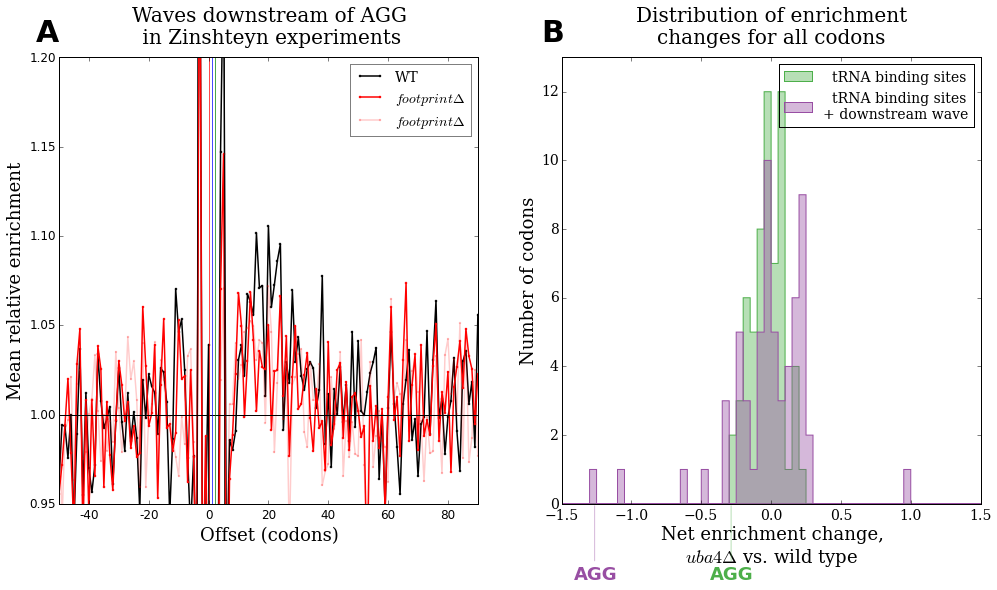

In [63]:
fig, (wave_ax, hist_ax) = plt.subplots(1, 2, figsize=(8 * 2, 8), gridspec_kw={'left': 0.1, 'right': 0.9})
codon_id = 'AGG'
names = ['WT-URA_footprint', 'AGG-OE_footprint', 'AGG-QC_footprint']

red = matplotlib.colors.colorConverter.to_rgba('red', alpha=0.2)
bright_red = matplotlib.colors.colorConverter.to_rgba('red', alpha=1.0)
black = matplotlib.colors.colorConverter.to_rgba('black', alpha=0.3)
bright_black = matplotlib.colors.colorConverter.to_rgba('black', alpha=1.0)

def sample_to_color(s):
    if 'AGG-OE' in s:
        color = bright_red
    elif 'WT' in s:
        color = bright_black
    elif 'AGG' in s:
        color = red
    else:
        color = black
    return color

sample_to_label = {}
for name in names:
    if 'WT' in name:
        condition = 'WT'
    else:
        condition = '${0}\Delta$'.format(name.split('_')[1])
    if name[-2] == '_':
        rep = ' (rep {0})'.format(name[-1])
    else:
        rep = ''
    sample_to_label[name] = condition + rep
    
pausing.plot_codon_enrichments([n for n in names],
                               enrichments,
                               [codon_id],
                               min_x=-90,
                               max_x=50,
                               flip=True,
                               ax=wave_ax,
                               force_ylims=(0.95, 1.20),
                               legend_kwargs={'loc': 'upper right',
                                              'prop': {'family': 'serif', 'size': 14},
                                             },
                               marker_size=4,
                               line_width=1.5,
                               split_by_codon=True,
                               smooth_window=0,
                               condition=(0.1, 200, 200),
                               sample_to_color=sample_to_color,
                               sample_to_label=sample_to_label,
                              )
wave_ax.yaxis.label.set_size(16)
wave_ax.xaxis.label.set_size(16)

for label in wave_ax.get_xticklabels() + wave_ax.get_yticklabels():
    label.set_size(12)

wave_ax.set_title('Waves downstream of {}\n in Zinshteyn experiments'.format(codon_id), size=20, y=1.02, family='serif')
wave_ax.set_ylabel('Mean relative enrichment' , size=18, family='serif')
wave_ax.set_xlabel('Offset (codons)' , size=18, family='serif')

wt_name = 'WT-URA_footprint'
deletion_name, deletion_label = 'AGG-OE_footprint', '$uba4\Delta$ vs. wild type'
codons_to_mark = [codon_id]
compare_active_to_corrected(wt_name, deletion_name, deletion_label, [codon_id], hist_ax, wave_slice=slice(-6, -60, -1))

for ax, letter in zip((wave_ax, hist_ax), 'AB'):
    ax.annotate(letter,
                xy=(0, 1),
                xycoords='axes fraction',
                xytext=(0, 10),
                textcoords='offset points',
                ha='right',
                va='bottom',
                size=30,
                weight='bold',
               )

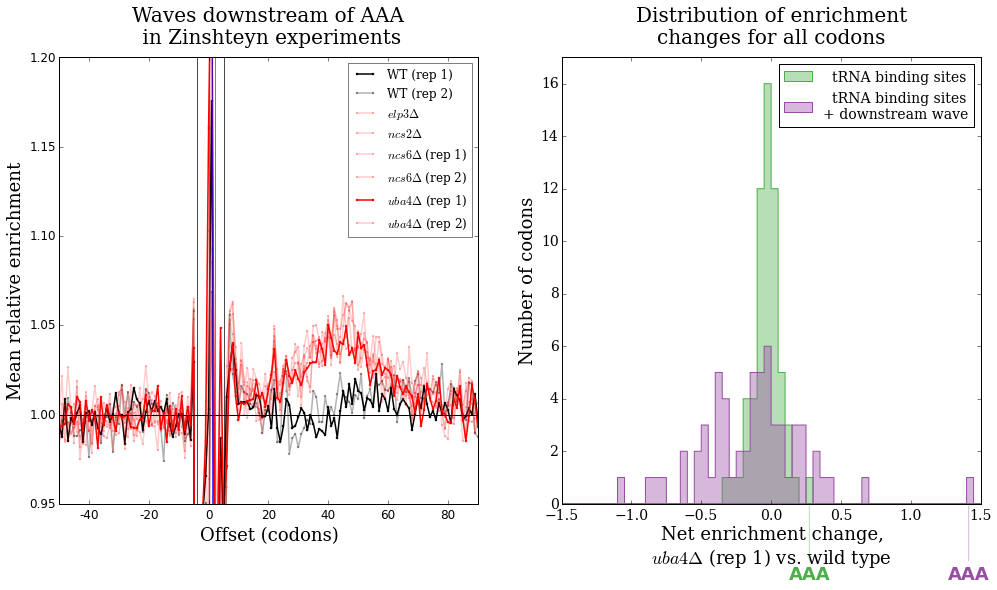

In [71]:
fig, (wave_ax, hist_ax) = plt.subplots(1, 2, figsize=(8 * 2, 8), gridspec_kw={'left': 0.1, 'right': 0.9})

codon_id = 'AAA'

names = [name for name in sorted(experiments['zinshteyn_plos_genetics']) if 'Ribosome' in name]

sample_to_label = {}
for name in names:
    if 'WT' in name:
        condition = 'WT'
    else:
        condition = '${0}\Delta$'.format(name.split('_')[1])
    if name[-2] == '_':
        rep = ' (rep {0})'.format(name[-1])
    else:
        rep = ''
    sample_to_label[name] = condition + rep
    
red = matplotlib.colors.colorConverter.to_rgba('red', alpha=0.2)
bright_red = matplotlib.colors.colorConverter.to_rgba('red', alpha=1.0)
black = matplotlib.colors.colorConverter.to_rgba('black', alpha=0.3)
bright_black = matplotlib.colors.colorConverter.to_rgba('black', alpha=1.0)

def sample_to_color(s):
    if 'delta_uba4' in s and s.endswith('1'):
        color = bright_red
    elif 'WT' in s and s.endswith('1'):
        color = bright_black
    elif 'delta' in s:
        color = red
    else:
        color = black
    return color
    
pausing.plot_codon_enrichments([n for n in names],
                               enrichments,
                               [codon_id],
                               min_x=-90,
                               max_x=50,
                               flip=True,
                               ax=wave_ax,
                               force_ylims=(0.95, 1.2),
                               legend_kwargs={'loc': 'upper right',
                                              'prop': {'family': 'serif', 'size': 12},
                                             },
                               marker_size=4,
                               line_width=1.5,
                               split_by_codon=True,
                               smooth_window=0,
                               condition=(0.1, 90, 90),
                               sample_to_color=sample_to_color,
                               sample_to_label=sample_to_label,
                              )
wave_ax.yaxis.label.set_size(16)
wave_ax.xaxis.label.set_size(16)

for label in wave_ax.get_xticklabels() + wave_ax.get_yticklabels():
    label.set_size(12)

wave_ax.set_title('Waves downstream of {0}\n in Zinshteyn experiments'.format(codon_id), size=20, y=1.02, family='serif')
wave_ax.set_ylabel('Mean relative enrichment' , size=18, family='serif')
wave_ax.set_xlabel('Offset (codons)' , size=18, family='serif')

wt_name = 'WT_Ribosome_Footprint_1'
deletion_name, deletion_label = 'delta_uba4_Ribosome_Footprint_1', '$uba4\Delta$ (rep 1) vs. wild type'
codons_to_mark = [codon_id]
compare_active_to_corrected(wt_name, deletion_name, deletion_label, [codon_id], hist_ax,
                            #condition=(0.1, 90, 90),
                           )
fig.savefig('paper/zinshteyn_waves.png', bbox_inches='tight')

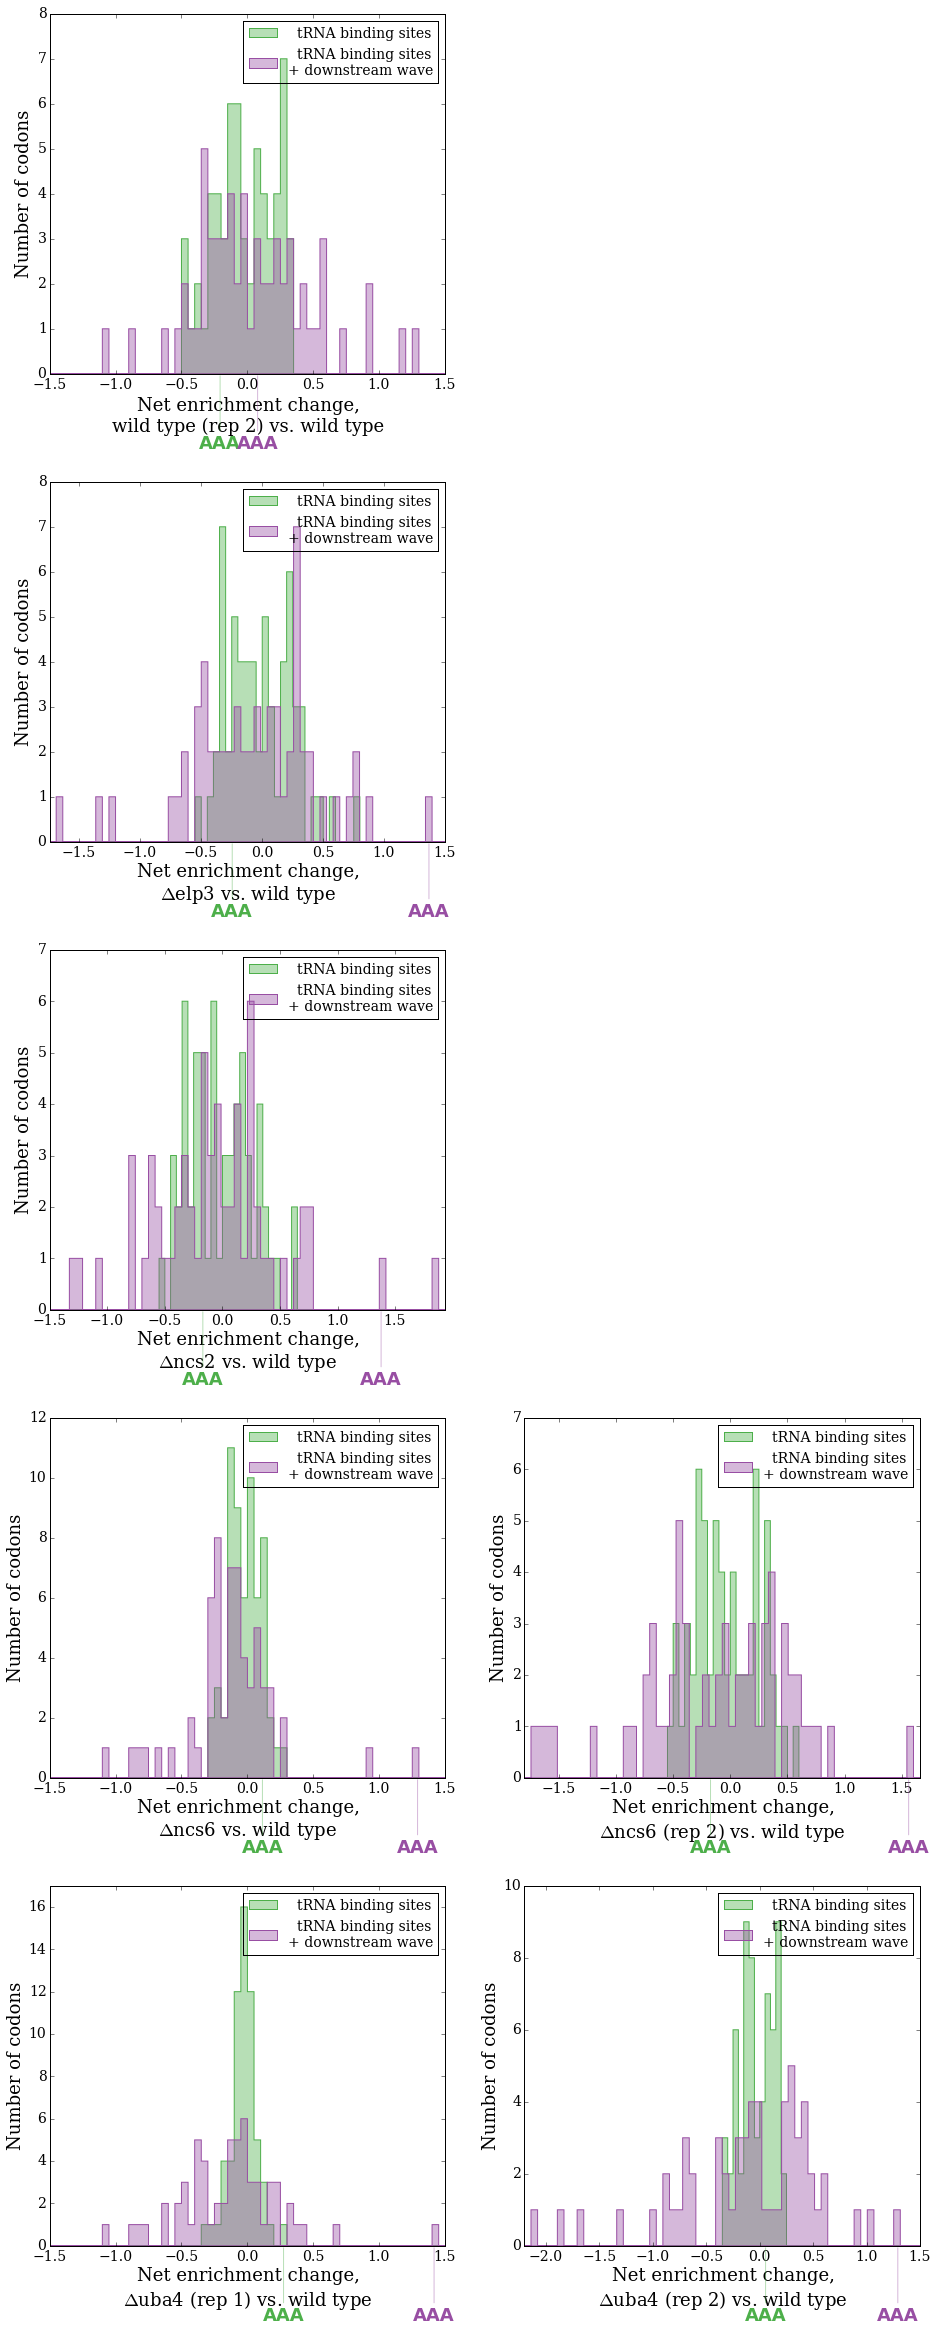

In [72]:
wt_name = 'WT_Ribosome_Footprint_1'
deletion_names = [
    ('WT_Ribosome_Footprint_2', 'wild type (rep 2) vs. wild type'),
    None,
    ('delta_elp3_Ribosome_Footprint', '$\Delta$elp3 vs. wild type'),
    None,
    ('delta_ncs2_Ribosome_Footprint', '$\Delta$ncs2 vs. wild type'),
    None,
    ('delta_ncs6_Ribosome_Footprint_1', '$\Delta$ncs6 vs. wild type'),
    ('delta_ncs6_Ribosome_Footprint_2', '$\Delta$ncs6 (rep 2) vs. wild type'),
    ('delta_uba4_Ribosome_Footprint_1', '$\Delta $uba4 (rep 1) vs. wild type'),
    ('delta_uba4_Ribosome_Footprint_2', '$\Delta$uba4 (rep 2) vs. wild type'),
]

codons_to_mark = ['AAA']

num_rows, num_cols = int(np.ceil(len(deletion_names) / 2.)), 2

fig, axs = plt.subplots(num_rows, num_cols,
                        figsize=(7.8 * num_cols, 8 * num_rows),
                        gridspec_kw={'hspace': 0.3},
                       )
for name_and_label, ax in itertools.izip_longest(deletion_names, axs.flatten()):
    if name_and_label == None:
        fig.delaxes(ax)
        continue
        
    deletion_name, xlabel = name_and_label
    compare_active_to_corrected(wt_name, deletion_name, xlabel, codons_to_mark, ax,
                                condition=(0.1, 200, 200),
                               )
    ax.set_title('')
fig.savefig('paper/all_zinshteyn_hists.png', bbox_inches='tight')

In [36]:
noCHX_exps = [
    ('weinberg', lambda n: 'RPF' in n, 'Weinberg'),
    ('gerashchenko_nar', lambda n: 'noCHX' in n and 'aurin' not in n and 'edeine' not in n, 'Gerashchenko NAR'),
    ('guydosh_cell', lambda n: 'wild' in n and ('no_additive' in n or n.endswith('CHX')), 'Guydosh'),
    #('lareau_elife', lambda n: 'Untreated' in n, 'Lareau'),
    #('pop_msb', lambda n: 'footprint' in n, 'Pop'),
    #('gardin_elife', lambda n: 'ribosome_footprints_for_wildtype' in n, 'Gardin'),
    #('nedialkova_cell', lambda n: 'WT_ribo' in n and 'noCHX' in n, 'Nedialkova'),
    ('jan_science', lambda n: '-CHX' in n and 'input' in n, 'Jan'),
    ('williams_science', lambda n: '-CHX' in n and 'input' in n, 'Williams'),
]

noCHX_names = []
for name, restriction, label in noCHX_exps:
    for n in experiments[name]:
        if restriction(n):
            noCHX_names.append((n, label + ' ' + n[:25], label))
            
CHX_exps = [
    #('belgium_2013_08_06', lambda n: 'sample' in n and 'WT' in n, 'Ours (old)'),
    ('belgium_2014_12_10', lambda n: 'FP' in n and 'WT' in n, 'Ours (new)'),
    ('ingolia_science', lambda n: 'Footprints' in n, 'Ingolia'),
    ('zinshteyn_plos_genetics', lambda n: 'Footprint' in n, 'Zinshteyn'),
    ('mcmanus_gr', lambda n: 'Ribo' in n, 'McManus'),
    ('gerashchenko_pnas', lambda n: 'foot' in n, 'Gerashchenko'),
    ('nedialkova_cell', lambda n: 'WT_ribo' in n and 'noCHX' not in n, 'Nedialkova'),
    ('dunn_elife', lambda n: 'dunn_elife' in n, 'Dunn'),
    ('artieri_gr_2', lambda n: 'non_multiplexed' in n, 'Artieri'),
    ('brar_science', lambda n: 'footprints' in n, 'Brar'),
    ('jan_science', lambda n: '+CHX' in n and 'input' in n, 'Jan'),
    ('williams_science', lambda n: '+CHX' in n and 'input' in n, 'Williams'),
]

CHX_names = []
for name, restriction, label in CHX_exps:
    for n in experiments[name]:
        if restriction(n):
            CHX_names.append((n, label + ' ' + n[:25], label))

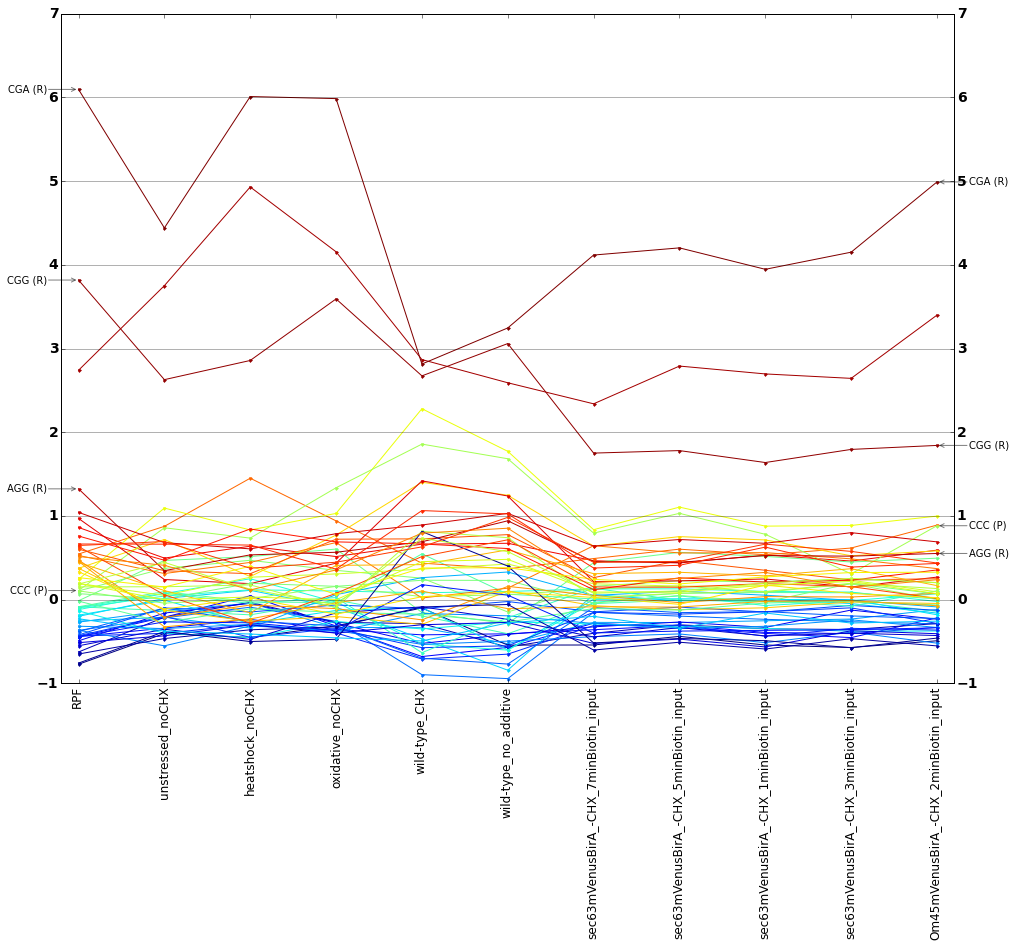

In [49]:
_ = pausing.plot_enrichments_across_conditions(enrichments,
                                               slice(-2, 1),
                                               [n for n, _, _ in noCHX_names if '' in n],
                                               highlight_movement=False,
                                               log_scale=False,
                                               #force_ylims=(-5, 5),
                                               #force_label={'TGG', 'CGA'},
                                               #force_highlight={'CCG'},
                                               label_rules=(4, 'raw', abs),
                                               rotate_labels=False,
                                              )

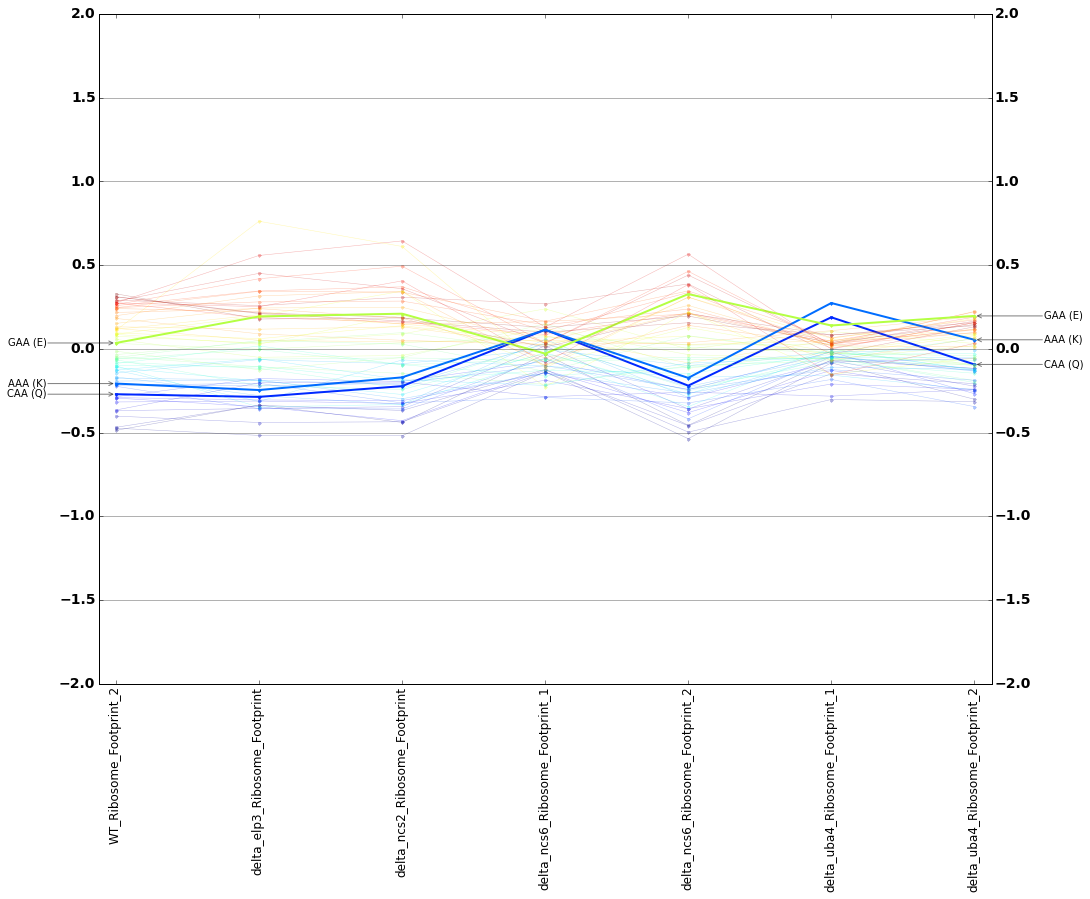

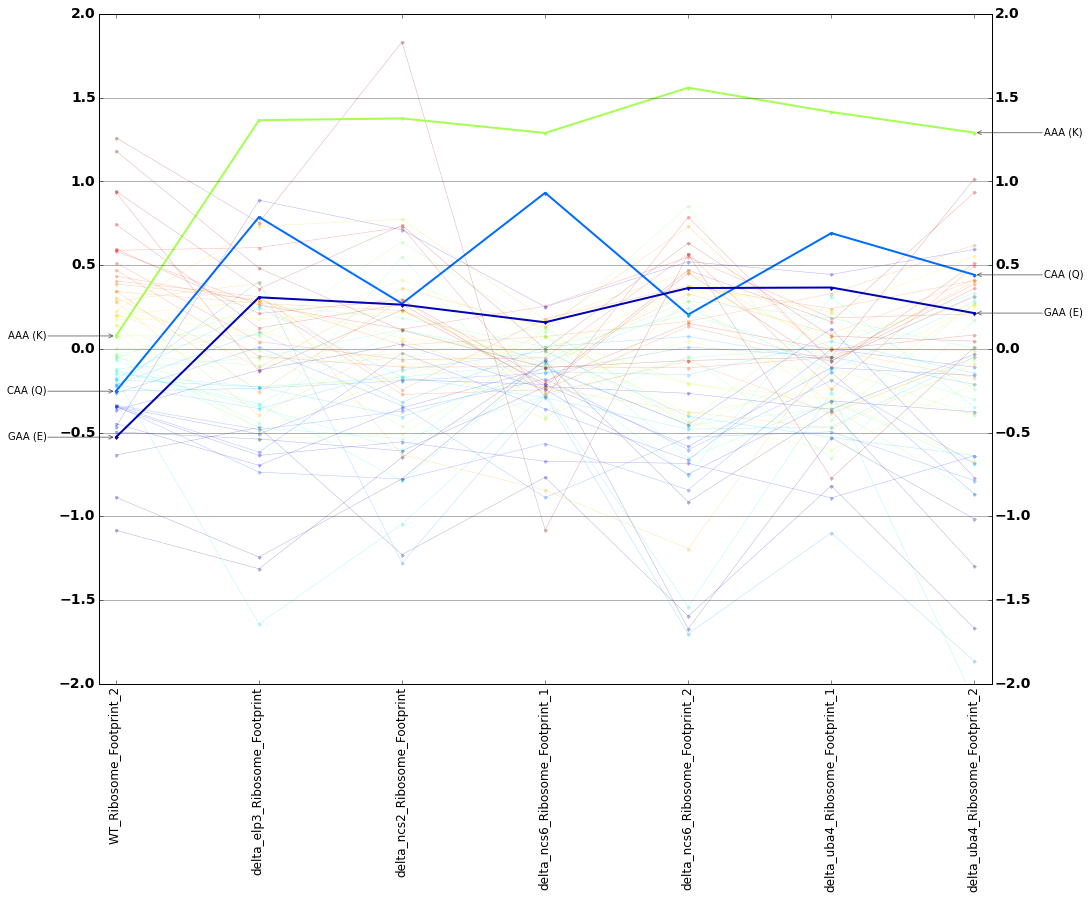

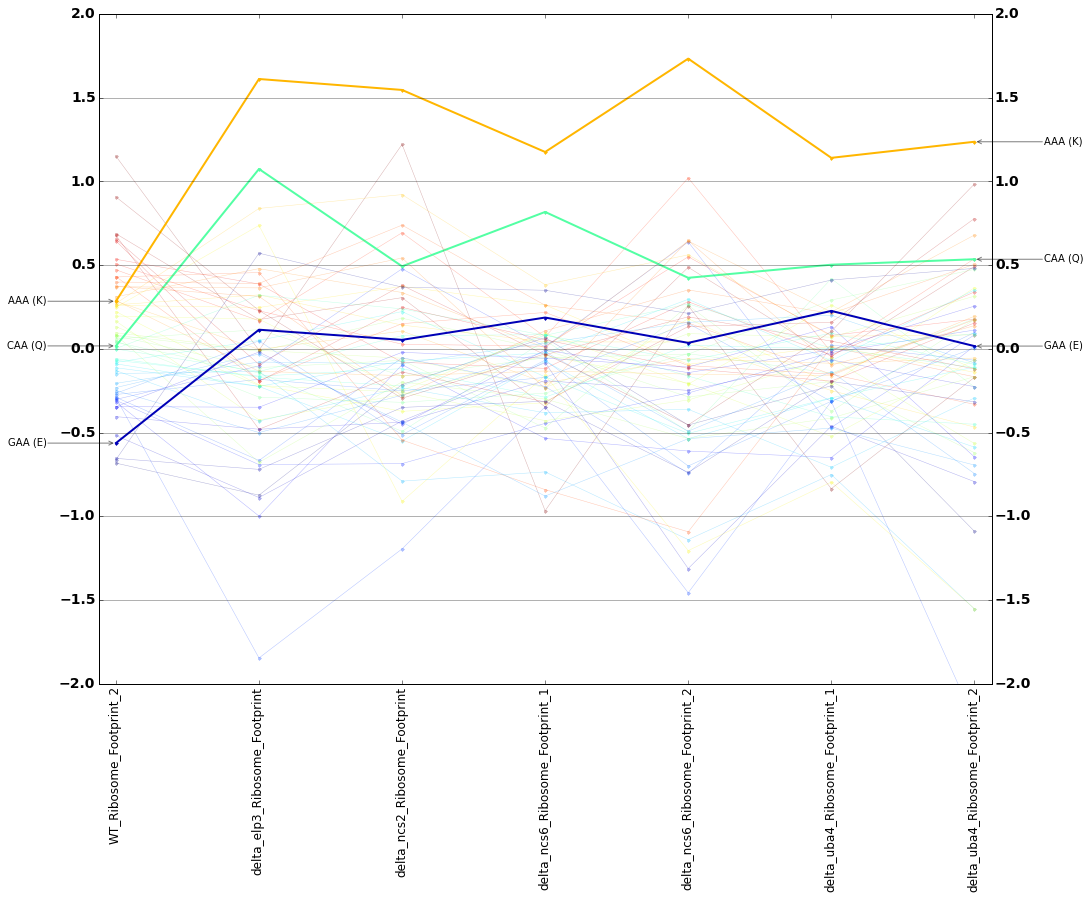

In [76]:
slices_list = [
   [slice(-2, 1)],
   [slice(-2, 1), slice(-6, -90, -1)],
   [slice(-6, -90, -1)],
]

forces = {'AAA', 'GAA', 'CAA'}

for slices in slices_list:
    fig = pausing.plot_enrichments_across_conditions(enrichments,
                                                     slices,
                                                     [n for n in sorted(experiments['zinshteyn_plos_genetics']) if 'Ribo' in n and n != 'WT_Ribosome_Footprint_1'],
                                                   highlight_movement=False,
                                                   log_scale=False,
                                                   force_ylims=(-2, 2),
                                                   force_label=forces,
                                                   force_highlight=forces,
                                                   #label_rules=(4, 'raw', abs),
                                                   rotate_labels=False,
                                                   compare_to='WT_Ribosome_Footprint_1',
                                                   label_offset=70,
                                                     condition=(0.1, 200, 200),
                                                  )

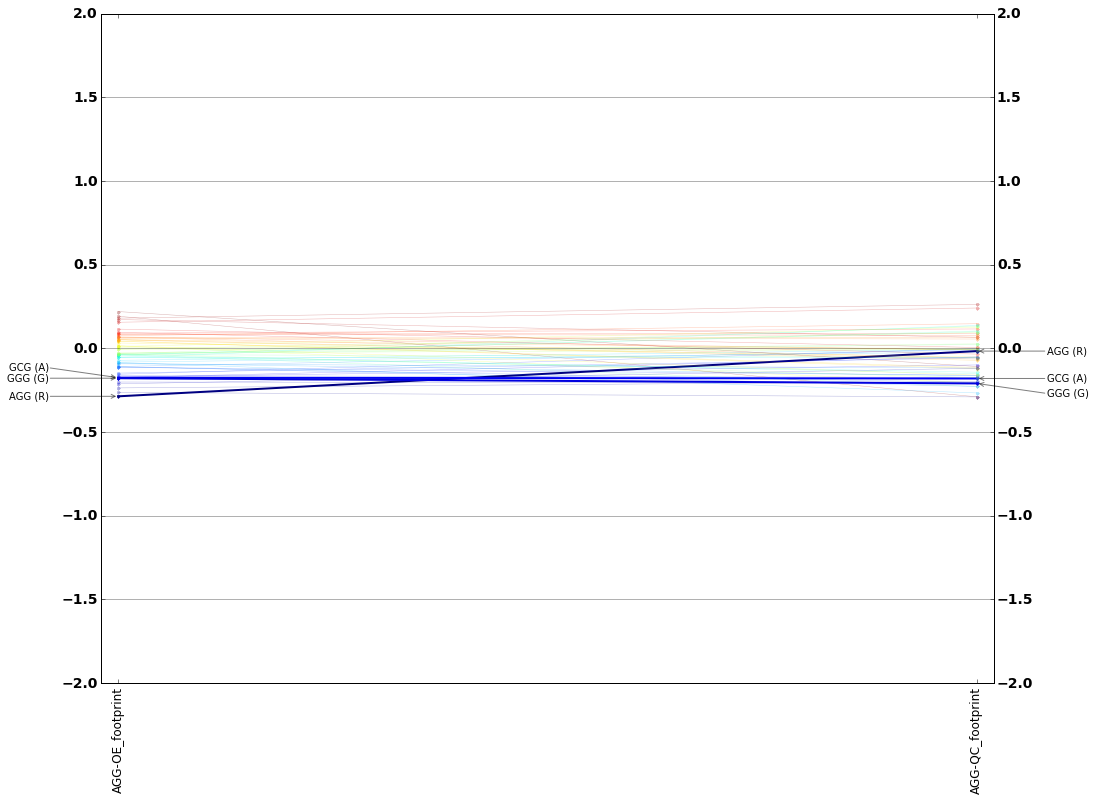

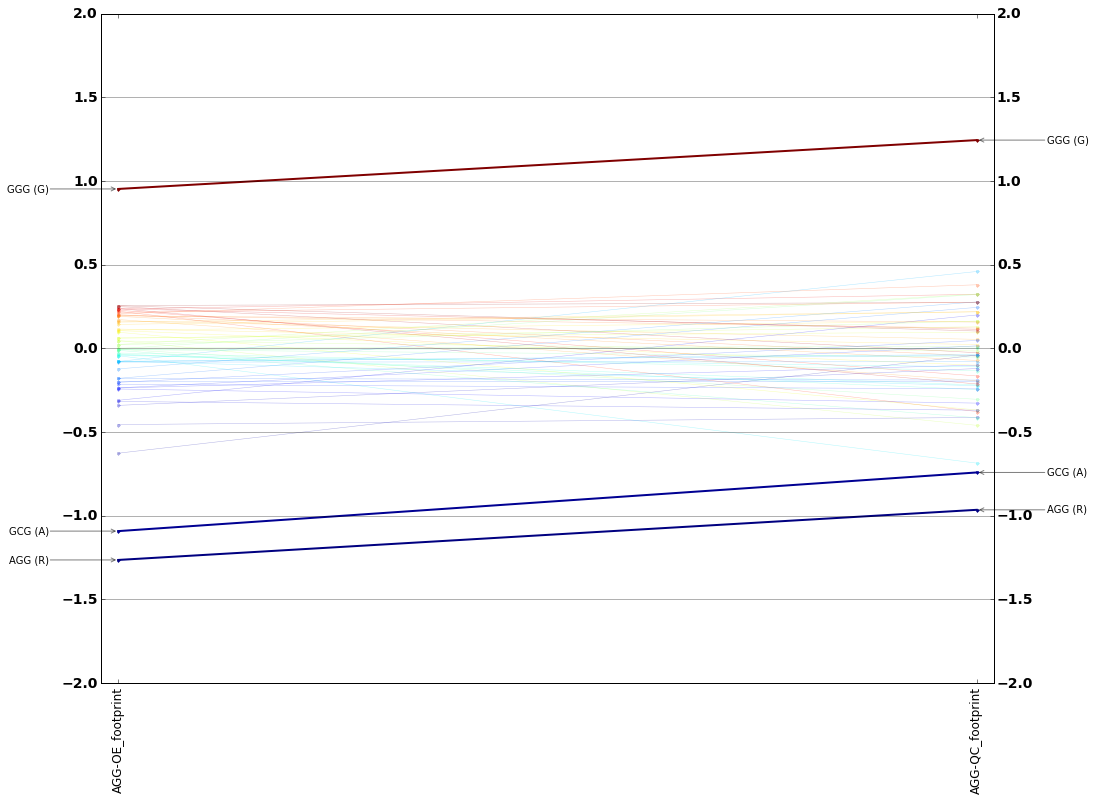

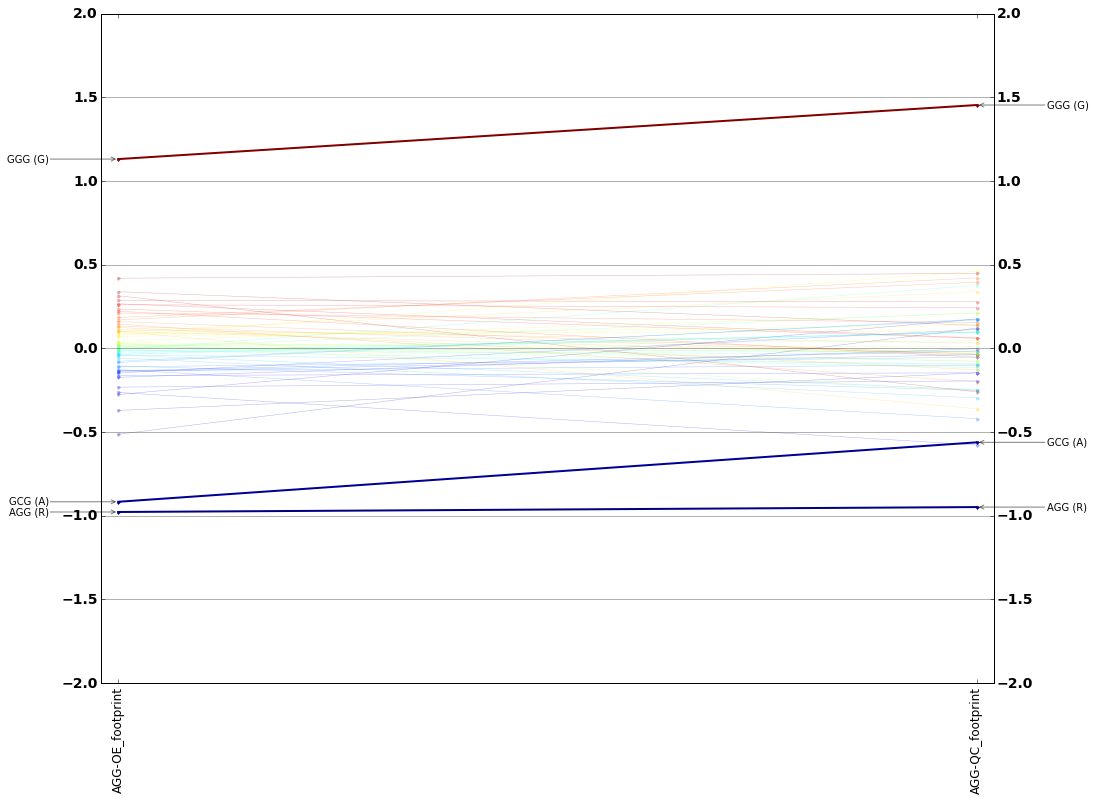

In [73]:
slices_list = [
   [slice(-2, 1)],
   [slice(-2, 1), slice(-6, -60, -1)],
   [slice(-6, -60, -1)],
]

for slices in slices_list:
    fig = pausing.plot_enrichments_across_conditions(enrichments,
                                                     slices,
                                                   ['AGG-OE_footprint', 'AGG-QC_footprint'],
                                                   highlight_movement=False,
                                                   log_scale=False,
                                                   force_ylims=(-2, 2),
                                                   force_label={'AGG', 'GGG', 'GCG'},
                                                   force_highlight={'AGG', 'GGG', 'GCG'},
                                                   #label_rules=(20, 'raw', abs),
                                                   rotate_labels=False,
                                                   compare_to='WT-URA_footprint',
                                                   label_offset=70,
                                                    condition=(0.1, 200, 200),
                                                  )